#### Outside Modeling Functions and Warning Suppression

In [16]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#### Google collab setup

In [3]:
from google.colab import drive, files

drive.mount("/content/gdrive", force_remount=True)
'''files.upload() #Upload the modeling_functions script to the virtual environment

#Import user defined modeling functions
from modeling_functions import grid_search_cv
from modeling_functions import evaluate_model'''

Mounted at /content/gdrive


'files.upload() #Upload the modeling_functions script to the virtual environment\n\n#Import user defined modeling functions\nfrom modeling_functions import grid_search_cv\nfrom modeling_functions import evaluate_model'

#### Modeling Data Imports

In [4]:
X_train = pd.read_csv('/content/gdrive/MyDrive/capstone/data/X_train.csv')
y_train = pd.read_csv('/content/gdrive/MyDrive/capstone/data/y_train.csv').values.ravel()

X_test = pd.read_csv('/content/gdrive/MyDrive/capstone/data/X_test.csv')
y_test = pd.read_csv('/content/gdrive/MyDrive/capstone/data/y_test.csv').values.ravel()

### Run Optmized Models

Runs the optimized models on the test data. Stores the accuracy score of predicted X_test 

In [12]:
names = ['DecisionTree', 'RandomForest', 'LogisticRegression']
models = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]
model_params = [{'max_leaf_nodes':2000}, {'ccp_alpha':1e-5}, {'C': 1e-05
                                                          ,'fit_intercept': True
                                                          ,'intercept_scaling': 1e-05
                                                          ,'penalty': 'none'
                                                          ,'solver': 'saga'
                                                          ,'warm_start': True
                                                          }
]
model_accuracy = []
for model, params in zip(models, model_params):
  _model = model(**params)
  _model.fit(X_train, y_train)
  y_pred = _model.predict(X_test)
  model_accuracy.append(accuracy_score(y_test, y_pred))


### Create Accuracy Plot

Creates a bar plot of model accuracies. 

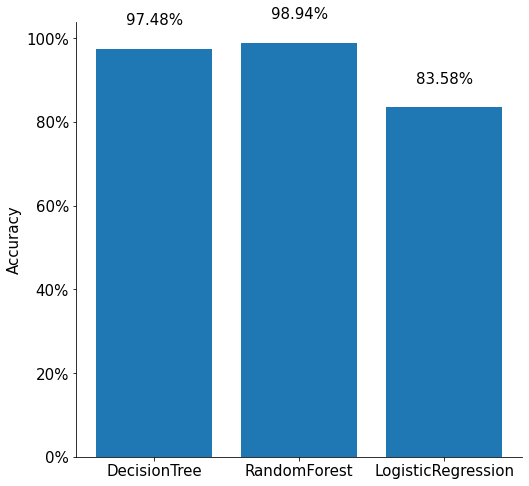

In [42]:
# Reformats accuracy scores to percent
accuracy_perc = [x*100 for x in model_accuracy]

# Initialize figure and plot accuracies
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(names, accuracy_perc)

# Reformat y-axis ticks as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Make some value labels for the bars
labels = [f"{np.round(val,2)}%" for val in accuracy_perc]

rects = ax.patches # Grabs Rectangle object from bar plot
for rect, label in zip(rects, labels):
  # Adds the labels to the graph above respective column using rectangle object location
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
# Remove spines for asthetics 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adds y axis label and increases font size
ax.set_ylabel('Accuracy')
plt.rcParams.update({'font.size': 15})

### Final Model
I will choose the RandomForest Model as my final model because it offers the highest accuracy.